### Initial Data Exploration

#### Import relevant packages.

In [1]:
import pandas as pd
import numpy as np

#### Read the datasets into dataframes.

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv")

#### Find out number of observations and columns.

In [3]:
print("Shape is:", df.shape)

Shape is: (129971, 14)


In [4]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Column data types.

In [5]:
df.dtypes

id                         int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

#### Data Cleaning:
#### taster_name and taster_twitter_handle are unnecessary

In [6]:
df.drop(['taster_name', 'taster_twitter_handle'], axis=1, inplace=True)

In [7]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'title', 'variety', 'winery'],
      dtype='object')

In [8]:
df.shape

(129971, 12)

#### Check for number of unique categories for categorical variables.

In [9]:
print(df.nunique())

id             129971
country            43
description    119955
designation     37976
points             21
price             390
province          425
region_1         1229
region_2           17
title          118840
variety           707
winery          16757
dtype: int64


In [10]:
for col in df.columns:
    #print(df[col].unique()) # to print categories name only
    print(df[col].value_counts()) # to print count of every category

0         1
84604     1
58057     1
60104     1
37575     1
         ..
126231    1
124182    1
128276    1
118035    1
2047      1
Name: id, Length: 129971, dtype: int64
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      

#### Check for missing values.

In [11]:
df.isnull().sum()

id                 0
country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
title              0
variety            1
winery             0
dtype: int64

In [12]:
df[df.isnull().any(axis=1)]

,id,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#### We lose too much data (it becomes 34k rows) if I were to drop rows with nulls. 
#### Thus we will impute missing values with the most frequent value.

In [13]:
#drop the observation(s) with missing values
#df.dropna(inplace=True)
#show there are no more observations with missing values
#df.isnull().sum()

#### Look at the distribution of the target columns. for categorical type, find out if it is imblanced. For numeric type, see how it is distributed  (summary statistics, boxplot, histogram).

In [14]:
df.describe()

,id,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


#### Average price is 35 dollars.
#### Average review is 88 points.

<AxesSubplot:>

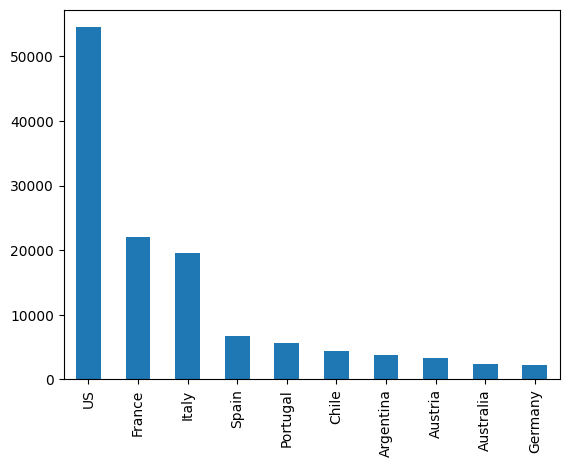

In [15]:
df['country'].value_counts().nlargest(10).plot(kind='bar') 

#### U.S. originated wine is the most reviewed, followed by France, Italy, Spain etc. 

In [16]:
df['province'].groupby(df['country']).value_counts().nlargest(10)

country    province        
US         California          36247
           Washington           8639
France     Bordeaux             5941
Italy      Tuscany              5897
US         Oregon               5373
France     Burgundy             3980
Spain      Northern Spain       3851
Italy      Piedmont             3729
Argentina  Mendoza Province     3264
Italy      Veneto               2716
Name: province, dtype: int64

#### Breakdown of most frequetly reviewed wine origins by country and province. 

#### Target variable is the wine price. 
#### Potential features include country, designation, points, province, region_1, region_2, title, variety, and winery.
#### Features that will not be used include id, description, taster_name, and taster_twitter_handle. 
#### First we will start with simple regression, and eventually multivariate regression via encoding the categorical variables. 

#### Do higher reviews lead to higher price? What kind of relationship do they have?

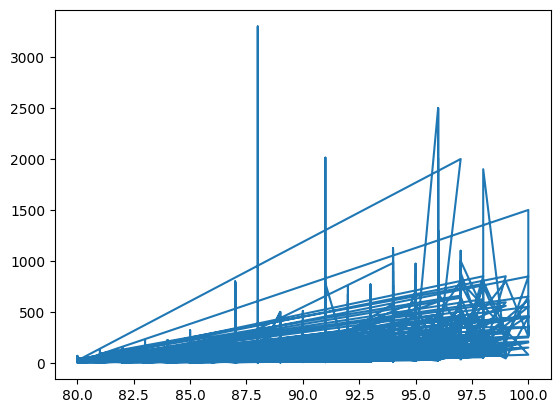

In [17]:
import matplotlib.pyplot as plt
  
y = df['price']
x = df['points']
  
plt.plot(x, y)  # Plot the chart
plt.show()  # display

#### This plot implies yes, but up to around 500 dollars. After 500 dollars the positive relationship plateaus. 

#### Scatter Plot

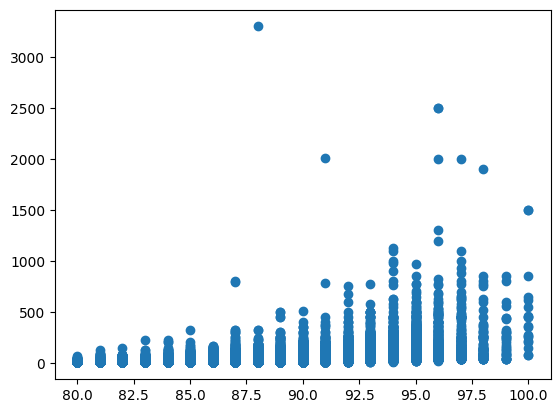

In [18]:
#X is review points
#Y is price

x = df['points']
y = df['price']

#points has 0 nulls, but price has 8996 nulls. 
#we need to take care of the nulls first.

#impute nulls with the mean.
y = y.fillna(y.mean())

plt.scatter(x, y)
plt.show()

#### Simple Linear Regression

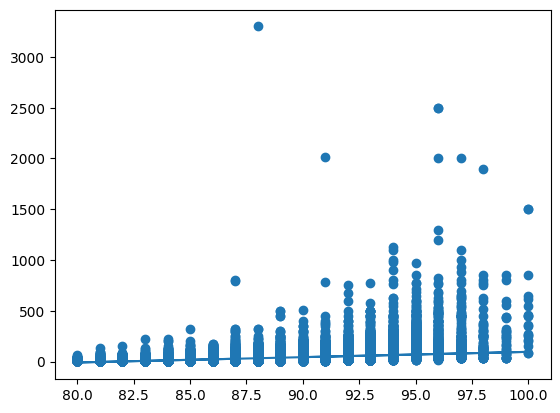

In [19]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [20]:
print(r)

0.40213688263716085


In [21]:
df.corr()

,id,points,price
id,1.000000,0.007124,0.004823
points,0.007124,1.000000,0.416167
price,0.004823,0.416167,1.000000


#### With a corrrelation coefficient of .4, this shows a slight positive relationsip. This is a weaker relationship than I expected. I am hoping that introducing more variables into the model will improve the predictability of the model.

In [22]:
#prediction for review points of 88 and 100
print(myfunc(88))
print(myfunc(100))

33.0222660546014
95.85178144252251


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c684e12a-2caf-4332-a376-3ad8608a07be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>